In [1]:
from memflow.read_data.dataset_all import DatasetCombined
from memflow.unfolding_network.conditional_transformer import ConditioningTransformerLayer
from memflow.unfolding_flow.utils import *

import numpy as np
import torch
from torch import optim
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.nn.functional import normalize
from torch.optim.lr_scheduler import CosineAnnealingLR

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from tensorboardX import SummaryWriter
from omegaconf import OmegaConf
import sys
import argparse
import os
from pynvml import *
from hist import Hist
import vector

In [2]:
batchSize = 1024
path_data = '../../dataset/v7/'
device = torch.device('cpu')

path_unscaled = 'results_preTraining/runs/preTraining-MEMFlow_v0/unscaledRegressedPartonsTensor.pt'

In [3]:
data = DatasetCombined(path_data, dev=device, dtype=torch.float64,
                        reco_list=[],
                        parton_list=['data_higgs_t_tbar_ISR_cartesian'])

dataCorrect = data.parton_data.data_higgs_t_tbar_ISR_cartesian

higgsCorrect = vector.array(
    {
        "E": dataCorrect[:,0,0].detach().numpy(),
        "px": dataCorrect[:,0,1].detach().numpy(),
        "py": dataCorrect[:,0,2].detach().numpy(),
        "pz": dataCorrect[:,0,3].detach().numpy(),
    }
)

thadCorrect = vector.array(
    {
        "E": dataCorrect[:,1,0].detach().numpy(),
        "px": dataCorrect[:,1,1].detach().numpy(),
        "py": dataCorrect[:,1,2].detach().numpy(),
        "pz": dataCorrect[:,1,3].detach().numpy(),
    }
)

tlepCorrect = vector.array(
    {
        "E": dataCorrect[:,2,0].detach().numpy(),
        "px": dataCorrect[:,2,1].detach().numpy(),
        "py": dataCorrect[:,2,2].detach().numpy(),
        "pz": dataCorrect[:,2,3].detach().numpy(),
    }
)

glISRCorrect = vector.array(
    {
        "E": dataCorrect[:,3,0].detach().numpy(),
        "px": dataCorrect[:,3,1].detach().numpy(),
        "py": dataCorrect[:,3,2].detach().numpy(),
        "pz": dataCorrect[:,3,3].detach().numpy(),
    }
)


RecoLevel
Reading reco_level Files

PartonLevel
Reading parton_level Files


In [4]:
unscaledTensor = torch.load(path_unscaled)

data_regressed = torch.sign(unscaledTensor)*(torch.exp(torch.abs(unscaledTensor)) - 1)

higgs = vector.array(
    {
        "E": data_regressed[:,0,0].detach().numpy(),
        "px": data_regressed[:,0,1].detach().numpy(),
        "py": data_regressed[:,0,2].detach().numpy(),
        "pz": data_regressed[:,0,3].detach().numpy(),
    }
)

thad = vector.array(
    {
        "E": data_regressed[:,1,0].detach().numpy(),
        "px": data_regressed[:,1,1].detach().numpy(),
        "py": data_regressed[:,1,2].detach().numpy(),
        "pz": data_regressed[:,1,3].detach().numpy(),
    }
)

tlep = vector.array(
    {
        "E": data_regressed[:,2,0].detach().numpy(),
        "px": data_regressed[:,2,1].detach().numpy(),
        "py": data_regressed[:,2,2].detach().numpy(),
        "pz": data_regressed[:,2,3].detach().numpy(),
    }
)

glISR = vector.array(
    {
        "E": data_regressed[:,3,0].detach().numpy(),
        "px": data_regressed[:,3,1].detach().numpy(),
        "py": data_regressed[:,3,2].detach().numpy(),
        "pz": data_regressed[:,3,3].detach().numpy(),
    }
)

print(unscaledTensor.shape)

torch.Size([569993, 4, 4])


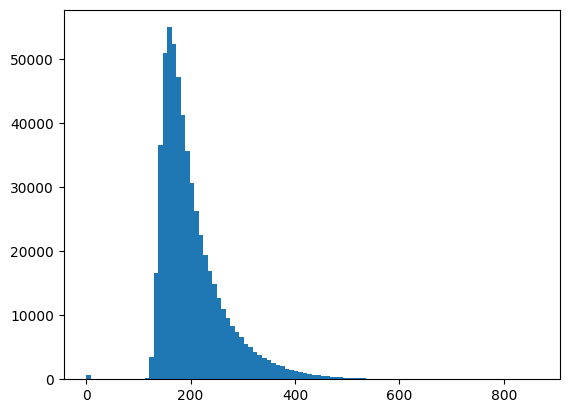

In [33]:
x = plt.hist(higgs["E"], bins=100)

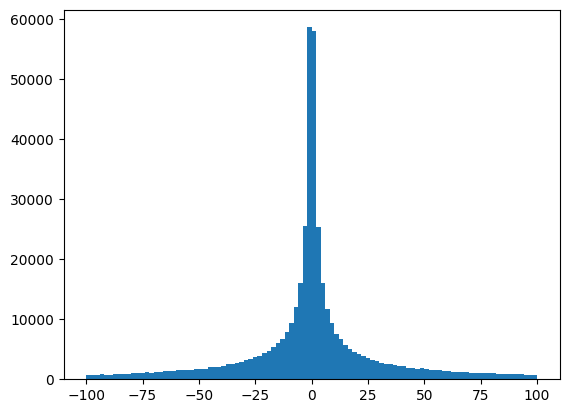

In [34]:
x = plt.hist(higgs["px"], bins=100, range=(-100,100))

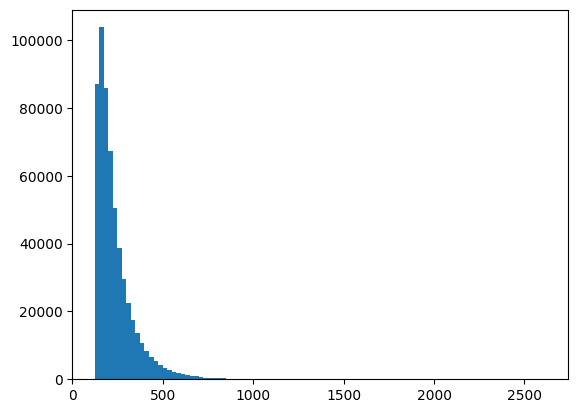

In [36]:
x = plt.hist(higgsCorrect["E"], bins=100)

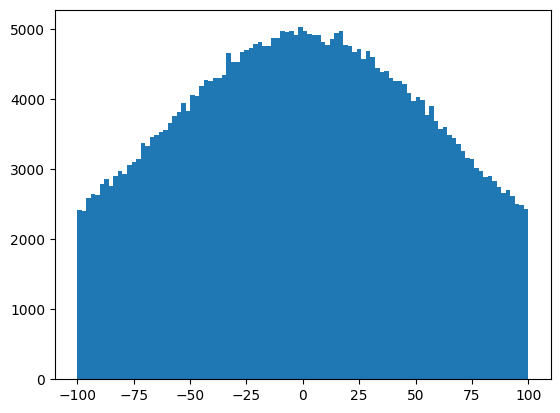

In [37]:
x = plt.hist(higgsCorrect["px"], bins=100, range=(-100,100))

In [9]:
glISR.mass

array([ -272.56683786,   101.02988439, -1750.61074762, ...,
           0.        ,     0.        ,     0.        ])

In [10]:
pi = torch.pi

# Quick construction, no other imports needed:
hist2d_eta_higgs = (
  Hist.new
  .Reg(bins=100, start=-pi, stop=pi, name="eta-correct", label="eta-correct")
  .Reg(bins=100, start=-pi, stop=pi, name="eta-regressed", label="eta-regressed")
  .Double())

hist2d_eta_thad = (
  Hist.new
  .Reg(bins=100, start=-pi, stop=pi, name="eta-correct", label="eta-correct")
  .Reg(bins=100, start=-pi, stop=pi, name="eta-regressed", label="eta-regressed")
  .Double())

hist2d_eta_tlep = (
  Hist.new
  .Reg(bins=100, start=-pi, stop=pi, name="eta-correct", label="eta-correct")
  .Reg(bins=100, start=-pi, stop=pi, name="eta-regressed", label="eta-regressed")
  .Double())

hist2d_E_thad = (
  Hist.new
  .Reg(bins=100, start=0, stop=1000, name="eta-correct", label="eta-correct")
  .Reg(bins=100, start=0, stop=1000, name="eta-regressed", label="eta-regressed")
  .Double())

hist2d_px_thad = (
  Hist.new
  .Reg(bins=100, start=-1000, stop=1000, name="eta-correct", label="eta-correct")
  .Reg(bins=100, start=-1000, stop=1000, name="eta-regressed", label="eta-regressed")
  .Double())

hist2d_py_thad = (
  Hist.new
  .Reg(bins=100, start=-1000, stop=1000, name="eta-correct", label="eta-correct")
  .Reg(bins=100, start=-1000, stop=1000, name="eta-regressed", label="eta-regressed")
  .Double())

hist2d_pz_thad = (
  Hist.new
  .Reg(bins=100, start=-1000, stop=1000, name="eta-correct", label="eta-correct")
  .Reg(bins=100, start=-1000, stop=1000, name="eta-regressed", label="eta-regressed")
  .Double())

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f8ed0ca1150>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f8ed0c142d0>, text=[])

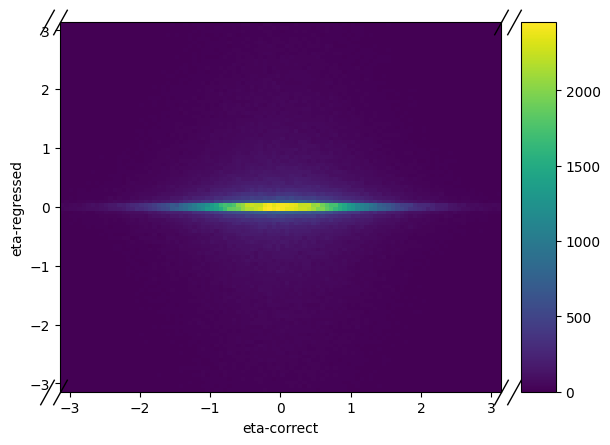

In [11]:
hist2d_eta_higgs.fill(higgsCorrect.eta,
                higgs.eta)
    
hist2d_eta_higgs.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f8ed0b80dd0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f8ed09cea10>, text=[])

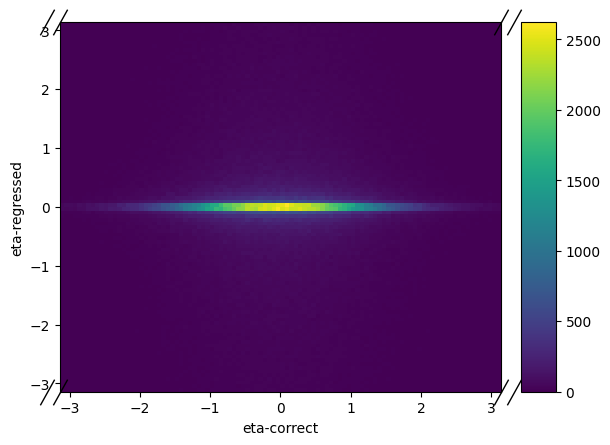

In [12]:
hist2d_eta_thad.fill(thadCorrect.eta,
                thad.eta)
    
hist2d_eta_thad.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f8ed0a5e650>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f8ed0a5ea10>, text=[])

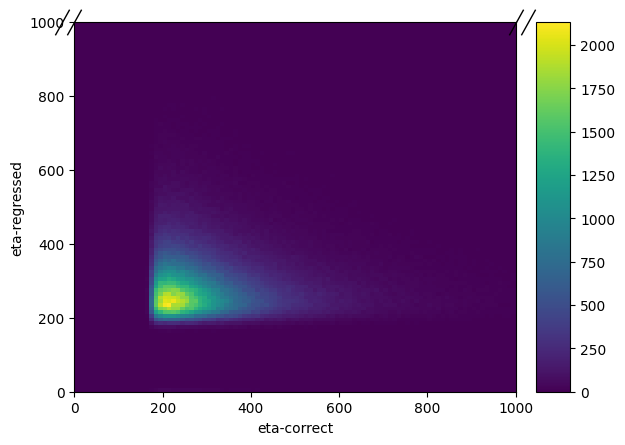

In [13]:
hist2d_E_thad.fill(thadCorrect.E,
                thad.E)
    
hist2d_E_thad.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f8ed094e650>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f8ed08eea10>, text=[])

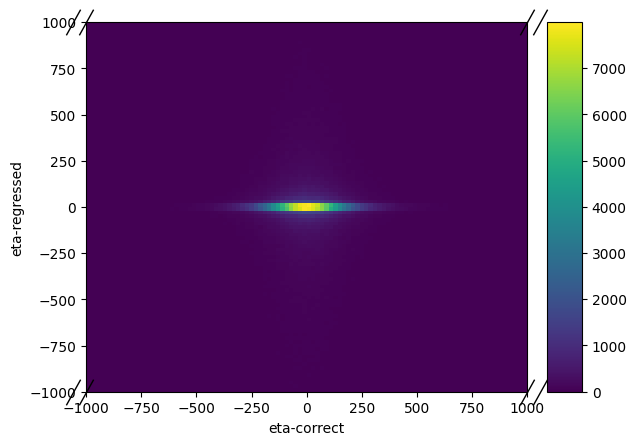

In [14]:
hist2d_px_thad.fill(thadCorrect.px,
                thad.px)
    
hist2d_px_thad.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f8ed081d4d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f8ed085ea10>, text=[])

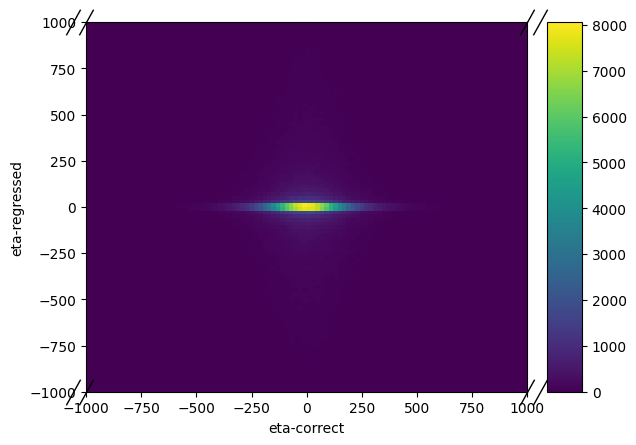

In [15]:
hist2d_py_thad.fill(thadCorrect.py,
                thad.py)
    
hist2d_py_thad.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f8ed06ff1d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f8ed08542d0>, text=[])

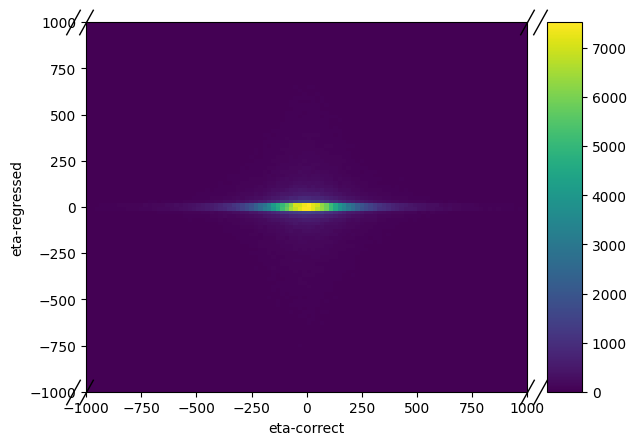

In [16]:
hist2d_pz_thad.fill(thadCorrect.pz,
                thad.pz)
    
hist2d_pz_thad.plot()

# Debug

In [17]:
data_debug = DatasetCombined(path_data, dev=device, dtype=torch.float64,
                        reco_list=[],
                        parton_list=['data_higgs_t_tbar_ISR',
                                    'data_higgs_t_tbar_ISR_cartesian',
                                     'log_data_higgs_t_tbar_ISR_cartesian',
                                     'logScaled_data_higgs_t_tbar_ISR_cartesian',
                                    'mean_log_data_higgs_t_tbar_ISR_cartesian',
                                    'std_log_data_higgs_t_tbar_ISR_cartesian'])
        


RecoLevel
Reading reco_level Files

PartonLevel
Reading parton_level Files
Load log_data_higgs_t_tbar_ISR_cartesian
Load logScaled_data_higgs_t_tbar_ISR_cartesian


In [18]:
data_debug.parton_data.std_log_data_higgs_t_tbar_ISR_cartesian

tensor([0.7190, 4.1955, 4.1955, 4.6356])

In [19]:
data_debug.parton_data.mean_log_data_higgs_t_tbar_ISR_cartesian

tensor([ 5.4430e+00, -1.7112e-03, -2.6181e-03, -3.8758e-03])

In [20]:
logP_Befnow = data_debug.parton_data.data_higgs_t_tbar_ISR_cartesian
noCart = data_debug.parton_data.data_higgs_t_tbar_ISR

logP_now = torch.sign(logP_Befnow)*torch.log(1+torch.abs(logP_Befnow))

print(logP_now.shape)

torch.Size([569993, 4, 4])


In [21]:
logP = data_debug.parton_data.log_data_higgs_t_tbar_ISR_cartesian
print(logP.shape)

torch.Size([569993, 4, 4])


In [22]:
particle = 3
feature = 0

print(logP_Befnow[:,particle,feature])
print(logP[:,particle,feature])
print(logP_now[:,particle,feature])

tensor([ 50.6259,  30.6760,  82.0437,  ...,  68.2837, 151.4650,  90.3637])
tensor([3.9440, 3.4556, 4.4194,  ..., 4.2382, 5.0269, 4.5148])
tensor([3.9440, 3.4556, 4.4194,  ..., 4.2382, 5.0269, 4.5148])


In [23]:
for p in range(4):
    for i in range(4):
        print(f"[{p}, {i}]: {torch.sum(logP[:,p,i])}")

[0, 0]: 3069186.794916988
[0, 1]: -2706.5393327429183
[0, 2]: -1820.5260003380265
[0, 3]: -8753.598712810966
[1, 0]: 3259415.295752026
[1, 1]: 3607.5307422663946
[1, 2]: 4812.797455628917
[1, 3]: -2671.2437390763316
[2, 0]: 3268370.87617908
[2, 1]: -7562.078009007324
[2, 2]: -13346.64423044329
[2, 3]: -321.60774720063694
[3, 0]: 2812936.213164882
[3, 1]: 2759.5322109148624
[3, 2]: 4385.2220545753535
[3, 3]: 2909.656976793059


In [24]:
(3069186.794916988 + 3259415.295752026 + 3268370.87617908 + 2812936.213164882)/569993/4


5.443009466788617

In [32]:
particle = 0
feature = 0

print(logP_Befnow[:,particle,1])
print(noCart[:,particle,0])
print(torch.cos(noCart[:,particle,2]))

print(logP[:,particle,0])
print('')
print(unscaledTensor[:,particle,feature].detach())
print(data_regressed[:,particle,feature].detach())

tensor([ -45.8886, -143.4538,   70.3318,  ...,   49.9386,   49.1797,
        -114.8525])
tensor([ 59.2402, 147.2656,  77.5312,  ..., 114.0313,  68.1992, 137.3906])
tensor([-0.7746, -0.9741,  0.9071,  ...,  0.4379,  0.7211, -0.8360])
tensor([5.0141, 5.3197, 5.0431,  ..., 5.3543, 4.9696, 5.2343])

tensor([5.3038, 5.1208, 5.0675,  ..., 0.0000, 0.0000, 0.0000])
tensor([200.0966, 166.4749, 157.7713,  ...,   0.0000,   0.0000,   0.0000])
